<br>

<center><img src="https://www.htu.edu.jo/images/ThumbnailsCoverPhotos/HTU%20Logo-250px.png" alt="HTU"  width="180px" align="center"> 


<br>

<p> 

**Data Science Programming**

10204281

Section (4)

**Data Preprocessing, Modeling, and Reporting**

**Submitted to**

Dr. Sinan Kamal

**Submitted on**

February 1st, 2023

**Submitted by**

Marwan Tareq Shafiq Al Farah

**Student ID**

21110011

Fall 2022 – 2023
</p></center>

# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# **Data Loading**

In [2]:
# Read the CSV file and create a dataframe named complaints_df
complaints_df = pd.read_csv('/content/Complaints.csv')

# **Data Preprocessing**

## OFFER_NAME

In [3]:
# Calculate the percentage of each unique value in the OFFER_NAME column
per_true = complaints_df['OFFER_NAME'].value_counts() / complaints_df['OFFER_NAME'].count()

# Replace missing values in the OFFER_NAME column with random choices based on the calculated percentages
complaints_df['OFFER_NAME'].fillna(pd.Series(np.random.choice(list(per_true.index), p=per_true, size=len(complaints_df))), inplace = True)

## CUSTOMER_GROUP

In [4]:
# Create a dictionary that maps OFFER_NAME values to a dictionary of CUSTOMER_GROUP counts
dict1 = {offer_name: dict(complaints_df[complaints_df['OFFER_NAME'] == offer_name]['CUSTOMER_GROUP'].value_counts() / complaints_df[complaints_df['OFFER_NAME'] == offer_name]['CUSTOMER_GROUP'].count()) for offer_name in list(complaints_df['OFFER_NAME'].unique())}

# Create a list of random values for CUSTOMER_GROUP, based on the OFFER_NAME value
list2 = [np.random.choice(list(dict1[complaints_df.iloc[i]['OFFER_NAME']].keys()), p = list(dict1[complaints_df.iloc[i]['OFFER_NAME']].values())) if str(complaints_df.loc[i]['CUSTOMER_GROUP']) == 'nan' else None for i in range(len(complaints_df))]

# Replace null values in the CUSTOMER_GROUP column with the corresponding value in list2
complaints_df['CUSTOMER_GROUP'] = np.where(complaints_df['CUSTOMER_GROUP'].isnull(), list2, complaints_df['CUSTOMER_GROUP'])

## AGE_BRACKET

In [5]:
# Replace missing values in the AGE_BRACKET column with 'The Case is Still Active'
complaints_df['AGE_BRACKET'].fillna("The Case is Still Active", inplace = True)

## CLOSE_GROUP & OPEN_GROUP

In [6]:
# Replace the value of 'CLOSE_GROUP' column with 'The Case is still Active' when 'CURRENT_STATUS' column is not 'Resolved'
complaints_df['CLOSE_GROUP'] = np.where(complaints_df['CURRENT_STATUS'] == 'Resolved', complaints_df['CLOSE_GROUP'], "The Case is still Active")

In [7]:
# Creating two dictionary mapping the 'OPEN_USER' and 'CLOSE_USER' with 'OPEN_GR' and 'CLOSE_GROUP'
dict1 = {str(complaints_df["CLOSE_USER"].iloc[index]): str(complaints_df["CLOSE_GROUP"].iloc[index]) for index in range(len(complaints_df)) if pd.notnull(complaints_df["CLOSE_GROUP"].iloc[index])}
dict2 = {str(complaints_df["OPEN_USER"].iloc[index]): str(complaints_df["OPEN_GR"].iloc[index]) for index in range(len(complaints_df)) if pd.notnull(complaints_df["OPEN_GR"].iloc[index])}

# Filling the missing values of 'CLOSE_GROUP' column by the value of 'CLOSE_USER' column, firstly it uses dict1 and then dict2
complaints_df["CLOSE_GROUP"] = complaints_df["CLOSE_GROUP"].fillna(complaints_df["CLOSE_USER"].map(dict1))
complaints_df["CLOSE_GROUP"] = complaints_df["CLOSE_GROUP"].fillna(complaints_df["CLOSE_USER"].map(dict2))

# Filling the missing values of 'OPEN_GR' column by the value of 'OPEN_USER' column, firstly it uses dict1 and then dict2
complaints_df["OPEN_GR"].fillna(complaints_df["OPEN_USER"].map(dict1), inplace = True)
complaints_df["OPEN_GR"].fillna(complaints_df["OPEN_USER"].map(dict2), inplace = True)

In [8]:
# Get a list of unique 'CLOSE_USER' where 'CLOSE_GROUP' is missing 
list1 = complaints_df[complaints_df['CLOSE_GROUP'].isnull()]['CLOSE_USER'].unique().tolist()

# Get the proportion of relative frequency of non-null 'CLOSE_GROUP' column except 'The Case is still Active'
per_true = complaints_df['CLOSE_GROUP'].value_counts().drop('The Case is still Active') / (complaints_df['CLOSE_GROUP'].count() - complaints_df['CLOSE_GROUP'].value_counts()['The Case is still Active'])

# Choose a random value from the non-null 'CLOSE_GROUP' column for each element of list1
list2 = [np.random.choice(list(per_true.index), p=per_true) for i in list1]

# Replace the value of 'CLOSE_GROUP' column for each unique 'CLOSE_USER' in the list1 
for i in range(len(list1)):
  complaints_df['CLOSE_GROUP'][complaints_df['CLOSE_USER'] == list1[i]].replace(to_replace = list2[i])
  
# Fill the remaining missing values with a random value from the non-null 'CLOSE_GROUP' column
complaints_df['CLOSE_GROUP'].fillna(np.random.choice(list(per_true.index), p=per_true), inplace = True)

In [9]:
# Get a list of unique 'OPEN_USER' where 'OPEN_GR' is missing 
list1 = complaints_df[complaints_df['OPEN_GR'].isnull()]['OPEN_USER'].unique().tolist()

# Get the proportion of relative frequency of non-null 'OPEN_GR' column 
per_true = complaints_df['OPEN_GR'].value_counts() / complaints_df['OPEN_GR'].count()

# Choose a random value from the non-null 'OPEN_GR' column for each element of list1
list2 = [np.random.choice(list(per_true.index), p=per_true) for i in list1]

# Replace the value of 'OPEN_GR' column for each unique 'OPEN_USER' in the list1 
for i in range(len(list1)):
  complaints_df['OPEN_GR'][complaints_df['OPEN_USER'] == list1[i]].replace(to_replace = list2[i])
  
# Fill the remaining missing values with a random value from the non-null 'OPEN_GR' column
complaints_df['OPEN_GR'].fillna(np.random.choice(list(per_true.index), p=per_true), inplace = True)

## ESCALATED_GROUP

In [10]:
# Compute the relative frequency of values in the ESCALATED_GROUP column
per_true = complaints_df['ESCALATED_GROUP'].value_counts() / complaints_df['ESCALATED_GROUP'].count()

# Fill missing values of ESCALATED_GROUP column with random values chosen with the probability proportional to the relative frequency 
complaints_df['ESCALATED_GROUP'].fillna(pd.Series(np.random.choice(list(per_true.index), p=per_true, size=len(complaints_df))), inplace = True)

# Replace the filled missing value with 'The complaint wasn't escalated' when ESCALATION_FLAG column is 'No'
complaints_df['ESCALATED_GROUP'] = np.where(complaints_df['ESCALATION_FLAG'] == 'No', "The complaint wasn't escalated", complaints_df['ESCALATED_GROUP'])

## CALLBACK_MECHANISM

In [11]:
# Compute the relative frequency of values in the CALLBACK_MECHANISM column
per_true = complaints_df['CALLBACK_MECHANISM'].value_counts() / complaints_df['CALLBACK_MECHANISM'].count()

# Fill missing values of CALLBACK_MECHANISM column with random values chosen with the probability proportional to the relative frequency 
complaints_df['CALLBACK_MECHANISM'].fillna(pd.Series(np.random.choice(list(per_true.index), p=per_true, size=len(complaints_df))), inplace = True)

# Replace the filled missing value with 'User Not Filled' when ACTUAL_COMPLAINT column is 'User Not Filled'
complaints_df['CALLBACK_MECHANISM'] = np.where(complaints_df['ACTUAL_COMPLAINT'] == 'User Not Filled', 'User Not Filled', complaints_df['CALLBACK_MECHANISM'])

## drop()

In [12]:
# Drop the columns from the dataframe
complaints_df = complaints_df.drop(['OPEN_USER', 'CLOSE_USER', 'CASE_ID', 'OPEN_DATE', 'CLOSE_DATE', 'RESOLUTION', 'RESOLUTION_DESCRIPTION', 'CASE_DESC'], axis = 'columns')

## Converting all categorical variables to numeric

In [13]:
# Find the columns with object data type 
cat_columns = complaints_df.select_dtypes(['object']).columns

# Convert the object columns to categorical encoding
complaints_df[cat_columns] = complaints_df[cat_columns].apply(lambda x: pd.factorize(x)[0])

## Storing the input values in the X variable and all the ouputs in y variable

In [14]:
# Drop the column 'COMPLAINT_TYPE' from the DataFrame and assign it to the feature dataframe
X = complaints_df.drop(["COMPLAINT_TYPE"], axis=1)

# Extract the column 'COMPLAINT_TYPE' from the DataFrame and assign it to the target dataframe
y = complaints_df["COMPLAINT_TYPE"]

## Splitting the data into training and testing data

In [15]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# **Modeling**

## KNN Algorithm

In [16]:
# Create a K-Nearest Neighbor classifier object
classiferKNN = KNeighborsClassifier(n_neighbors=1)

# Create an array to store evaluation metrics
arrKNN = np.zeros((4,10))

# Train and evaluate the classifier in a loop for 10 iterations
for i in range(10):
  # Train the classifier
  classiferKNN = classiferKNN.fit(X_train,y_train)

  # Predict labels for the test set using the trained classifier
  y_pred_KNN = classiferKNN.predict(X_test)

  # Calculate evaluation metrics for the current iteration and store them in the array
  arrKNN[0][i] = accuracy_score(y_test,y_pred_KNN)
  arrKNN[1][i] = precision_score(y_test,y_pred_KNN)
  arrKNN[2][i] = recall_score(y_test,y_pred_KNN)
  arrKNN[3][i] = f1_score(y_test,y_pred_KNN)
arrKNN *= 100

In [17]:
# Calculate the mean of the evaluation metrics over all iterations
print("Accuracy: ",arrKNN[0].mean())
print("Precision: ",arrKNN[1].mean())
print("Recall: ",arrKNN[2].mean())
print("F1_score: ",arrKNN[3].mean())

Accuracy:  93.99903984637544
Precision:  88.02395209580837
Recall:  87.15415019762847
F1_score:  87.58689175769612


## Decision Tree Algorithm

In [18]:
# Create a Decision Tree classifier object
classiferDT = DecisionTreeClassifier()

# Create an array to store evaluation metrics
arrDT = np.zeros((4,10))

# Train and evaluate the classifier in a loop for 10 iterations
for i in range(10):
  # Train the classifier
  classiferDT = classiferDT.fit(X_train,y_train)

  # Predict labels for the test set using the trained classifier
  y_pred_DT = classiferDT.predict(X_test)

  # Calculate evaluation metrics for the current iteration and store them in the array
  arrDT[0][i] = accuracy_score(y_test,y_pred_DT)
  arrDT[1][i] = precision_score(y_test,y_pred_DT)
  arrDT[2][i] = recall_score(y_test,y_pred_DT)
  arrDT[3][i] = f1_score(y_test,y_pred_DT)
arrDT *= 100

In [19]:
# Calculate the mean of the evaluation metrics over all iterations
print("Accuracy: ",arrDT[0].mean())
print("Precision: ",arrDT[1].mean())
print("Recall: ",arrDT[2].mean())
print("F1_score: ",arrDT[3].mean())

Accuracy:  99.06385021603457
Precision:  97.76192576701814
Recall:  98.399209486166
F1_score:  98.07943691266391


## Gaussian Naive Bayes Algorithm

In [20]:
# Create a Gaussian Naive Bayes classifier object
classiferGNB = GaussianNB()

# Create an array to store evaluation metrics
arrGNB = np.zeros((4,10))

# Train and evaluate the classifier in a loop for 10 iterations
for i in range(10):
  # Train the classifier
  classiferGNB = classiferGNB.fit(X_train,y_train)

  # Predict labels for the test set using the trained classifier
  y_pred_GNB = classiferGNB.predict(X_test)

  # Calculate evaluation metrics for the current iteration and store them in the array
  arrGNB[0][i] = accuracy_score(y_test,y_pred_GNB)
  arrGNB[1][i] = precision_score(y_test,y_pred_GNB)
  arrGNB[2][i] = recall_score(y_test,y_pred_GNB)
  arrGNB[3][i] = f1_score(y_test,y_pred_GNB)
arrGNB *= 100

In [21]:
# Calculate the mean of the evaluation metrics over all iterations
print("Accuracy: ",arrGNB[0].mean())
print("Precision: ",arrGNB[1].mean())
print("Recall: ",arrGNB[2].mean())
print("F1_score: ",arrGNB[3].mean())

Accuracy:  83.14930388862219
Precision:  66.45435244161357
Recall:  61.857707509881415
F1_score:  64.07369498464689


## Random Forest Algorithm

In [22]:
# Create a Random Forest classifier object
classiferRF = RandomForestClassifier()

# Create an array to store evaluation metrics
arrRF = np.zeros((4,10))

# Train and evaluate the classifier in a loop for 10 iterations
for i in range(10):
  # Train the classifier
  classiferRF = classiferRF.fit(X_train,y_train)
  
  # Predict labels for the test set using the trained classifier
  y_pred_RF = classiferRF.predict(X_test)
  
  # Calculate evaluation metrics for the current iteration and store them in the array
  arrRF[0][i] = accuracy_score(y_test,y_pred_RF)
  arrRF[1][i] = precision_score(y_test,y_pred_RF)
  arrRF[2][i] = recall_score(y_test,y_pred_RF)
  arrRF[3][i] = f1_score(y_test,y_pred_RF)
arrRF *= 100

In [23]:
# Calculate the mean of the evaluation metrics over all iterations
print("Accuracy: ",arrRF[0].mean())
print("Precision: ",arrRF[1].mean())
print("Recall: ",arrRF[2].mean())
print("F1_score: ",arrRF[3].mean())

Accuracy:  99.22227556409027
Precision:  98.28518018940746
Recall:  98.51778656126483
F1_score:  98.40119660013984


# **Data Visualization**

In [24]:
# Calculate the evaluation metrics for each classifier
accuracies = [i.mean() for i in [arrKNN[0], arrDT[0], arrGNB[0], arrRF[0]]]
precisions = [i.mean() for i in [arrKNN[1], arrDT[1], arrGNB[1], arrRF[1]]]
recalls = [i.mean() for i in [arrKNN[2], arrDT[2], arrGNB[2], arrRF[2]]]
f1_scores = [i.mean() for i in [arrKNN[3], arrDT[3], arrGNB[3], arrRF[3]]]

# Create a list of the names of the classifiers
classifier_names = ['KNN', 'DT', 'GNB', 'RF']

# Create a list of the names of the evaluation measures
label_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

## **Bar Plot**

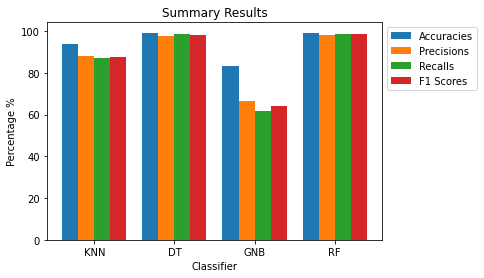

In [25]:
# Create x-axis tick marks and labels
x_axis = np.arange(len(classifier_names))

# Create bar plots for evaluation metrics
plt.bar(x_axis+0.1, accuracies, label='Accuracies', width=0.2)
plt.bar(x_axis+0.3, precisions, label='Precisions', width=0.2)
plt.bar(x_axis+0.5, recalls, label='Recalls', width=0.2)
plt.bar(x_axis+0.7, f1_scores, label='F1 Scores', width=0.2)
plt.xticks(x_axis+0.4, classifier_names)

# Add legend and labels
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Classifier')
plt.ylabel('Percentage %')
plt.title('Summary Results')

# Display plot
plt.show()

## **Box Plot**

### KNN Box Plot

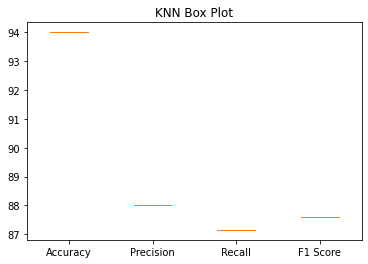

In [26]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot([arrKNN[0], arrKNN[1], arrKNN[2], arrKNN[3]], labels=label_names)

# Plot title
plt.title('KNN Box Plot')

# Display the plot
plt.show()

### Decision Tree Box Plot

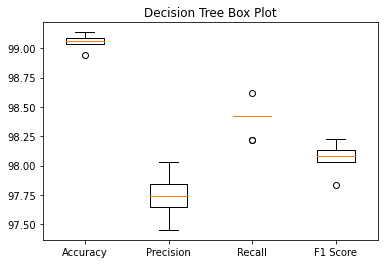

In [27]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot([arrDT[0], arrDT[1], arrDT[2], arrDT[3]], labels=label_names)

# Plot title
plt.title('Decision Tree Box Plot')

# Display the plot
plt.show()

### Gaussian Naive Bayes Box Plot

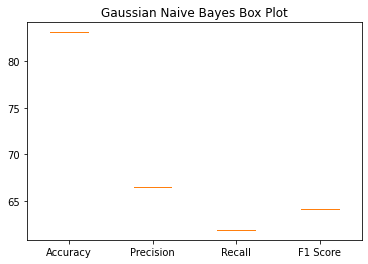

In [28]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot([arrGNB[0], arrGNB[1], arrGNB[2], arrGNB[3]], labels=label_names)

# Plot title
plt.title('Gaussian Naive Bayes Box Plot')

# Display the plot
plt.show()

### Random Forest Box Plot

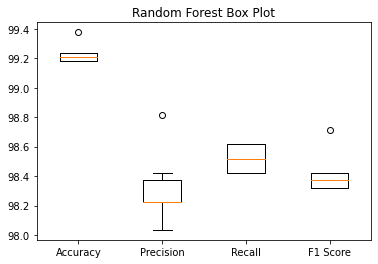

In [29]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot([arrRF[0], arrRF[1], arrRF[2], arrRF[3]], labels=label_names)

# Plot title
plt.title('Random Forest Box Plot')

# Display the plot
plt.show()

## **Radar**

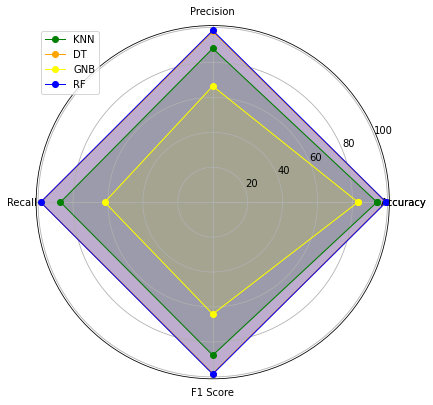

In [30]:
# Transpose the metrics array and convert it back to a list
metrics = np.array([accuracies, precisions, recalls, f1_scores]).T.tolist()
# Assign each list in the metrics array to a variable
KNN = metrics[0]
DT = metrics[1]
GNB = metrics[2]
RF = metrics[3]


# Create an array of angles for a polar plot using the linspace function of numpy
angles=np.linspace(0,2*np.pi,len(label_names), endpoint=False)

# Append the first angle to the end of the angles array to complete the circle
angles=np.concatenate((angles,[angles[0]]))

# Append the first value of label_names to all other arrays/lists used for visualization to maintain length consistency
label_names.append(label_names[0])
KNN.append(KNN[0])
DT.append(DT[0])
GNB.append(GNB[0])
RF.append(RF[0])

# Create a polar plot using matplotlib
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, polar=True)

# Plot KNN values
ax.plot(angles,KNN, 'o-', color='green', linewidth=1, label='KNN')
ax.fill(angles, KNN, alpha=0.25, color='green')

# Plot DT values
ax.plot(angles,DT, 'o-', color='orange', linewidth=1, label='DT')
ax.fill(angles, DT, alpha=0.25, color='orange')

# Plot GNB values
ax.plot(angles,GNB, 'o-', color='yellow', linewidth=1, label='GNB')
ax.fill(angles, GNB, alpha=0.25, color='yellow')

# Plot RF values
ax.plot(angles,RF, 'o-', color='blue', linewidth=1, label='RF')
ax.fill(angles, RF, alpha=0.25, color='blue')

# Set the angle labels and display grid
ax.set_thetagrids(angles * 180/np.pi, label_names)
plt.grid(True)
plt.tight_layout()

# Add legend
plt.legend()

# Display the plot
plt.show()